#Модели классификации

In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
# Загрузка данных по указанному URL
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

# Просмотр первых 5 строк датасета
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Информация о датасете
print(data.info())

# Статистическая сводка по данным
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [5]:
# Выделение целевой переменной и признаков
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

# Проверка размеров массивов
print(y.shape, X.shape)

(768,) (768, 8)


In [7]:
# Создание экземпляра модели
logistic = LogisticRegression(max_iter=1000)  # Увеличиваем количество итераций для лучшей сходимости

# Обучение модели
logistic.fit(X, y)

LogisticRegression(max_iter=1000)

In [8]:
# Коэффициенты модели
print("Коэффициенты: \n", logistic.coef_[0])

# Связка названий признаков с коэффициентами
for feature, coef in zip(X.columns, logistic.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Свободный коэффициент (intercept)
print("Intercept: \n", logistic.intercept_)

Коэффициенты: 
 [ 1.22481312e-01  3.51085717e-02 -1.33007000e-02  7.81917450e-04
 -1.17386223e-03  8.96453133e-02  8.68084149e-01  1.49863097e-02]
Pregnancies: 0.1225
Glucose: 0.0351
BloodPressure: -0.0133
SkinThickness: 0.0008
Insulin: -0.0012
BMI: 0.0896
DiabetesPedigreeFunction: 0.8681
Age: 0.0150
Intercept: 
 [-8.36470855]


Матрица классификации:
 [[444  56]
 [112 156]]


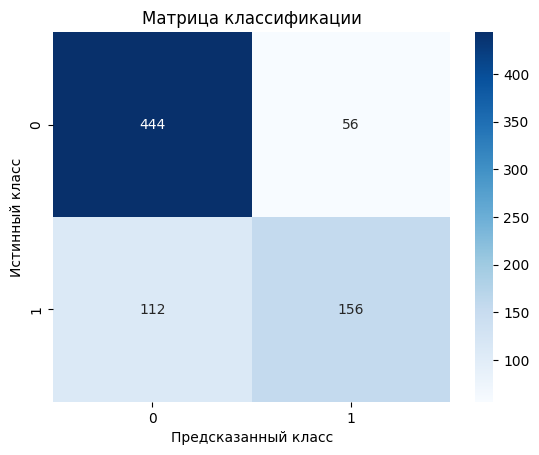

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.77       768

Точность модели: 0.78


In [10]:
# Предсказание
y_pred = logistic.predict(X)

# Матрица классификации
conf_matrix = metrics.confusion_matrix(y, y_pred)
print("Матрица классификации:\n", conf_matrix)

# Визуализация матрицы классификации
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица классификации')
plt.show()

# Отчет о классификации
print("Отчет о классификации:\n", metrics.classification_report(y, y_pred))

# Точность модели
accuracy = logistic.score(X, y)
print(f"Точность модели: {accuracy:.2f}")

In [14]:
# Создание полиномиальных признаков второго порядка
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

print(X_poly.shape)  # Проверка увеличения размерности

# Создание и обучение модели
polynomial = LogisticRegression(max_iter=10000)
polynomial.fit(X_poly, y)

# Предсказание
y_pred_poly = polynomial.predict(X_poly)

(768, 45)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Оценка качества полиномиальной модели
conf_matrix_poly = metrics.confusion_matrix(y, y_pred_poly)
print("Матрица классификации (полиномиальная модель):\n", conf_matrix_poly)

Матрица классификации (полиномиальная модель):
 [[451  49]
 [110 158]]


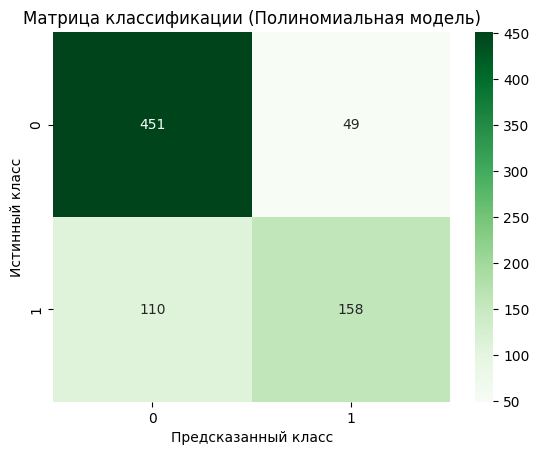

In [16]:
# Визуализация матрицы классификации полиномиальной модели
sns.heatmap(conf_matrix_poly, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица классификации (Полиномиальная модель)')
plt.show()

In [17]:
# Отчет о классификации полиномиальной модели
print("Отчет о классификации (Полиномиальная модель):\n", metrics.classification_report(y, y_pred_poly))

# Точность полиномиальной модели
accuracy_poly = polynomial.score(X_poly, y)
print(f"Точность полиномиальной модели: {accuracy_poly:.2f}")

Отчет о классификации (Полиномиальная модель):
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       500
           1       0.76      0.59      0.67       268

    accuracy                           0.79       768
   macro avg       0.78      0.75      0.76       768
weighted avg       0.79      0.79      0.79       768

Точность полиномиальной модели: 0.79


##Сравнение моделей:

Сравнив точности двух моделей, можно сделать вывод о том, какая модель показала лучшие результаты. Полиномиальная модель может уловить более сложные зависимости в данных, что может повысить точность, но также увеличивает риск переобучения (+больше затраты времени и ресурсов).

#Контрольные вопросы

###Чем отличается применение разных моделей классификации в библиотеке sklearn?

    Разные модели классификации в библиотеке scikit-learn реализуют различные алгоритмы и подходы к решению задачи классификации.
    Например, логистическая регрессия моделирует линейную границу между классами,
    метод опорных векторов (SVM) может использовать различные ядра для построения сложных границ,
    деревья решений строят иерархические правила принятия решений, а наивный байесовский
    классификатор основывается на теореме Байеса с предположением о независимости признаков.
    Выбор модели зависит от характера данных и задачи.

###Что показывает метрика точности регрессии?

    Метрика точности показывает долю правильно классифицированных объектов от общего числа объектов.
    Она рассчитывается как отношение числа верных предсказаний к общему числу предсказаний.

###Какое значение имеют коэффициенты логистической регрессии?

    Коэффициенты логистической регрессии отражают влияние соответствующих признаков
    на вероятность принадлежности объекта к положительному классу.
    Положительные коэффициенты увеличивают вероятность принадлежности к классу 1, а отрицательные — уменьшают.

###Что показывает матрица классификации?

    Матрица классификации показывает количество верных и неверных предсказаний модели для каждого класса.
    Она включает:
    True Positives (TP): Верно предсказанные положительные.
    True Negatives (TN): Верно предсказанные отрицательные.
    False Positives (FP): Неверно предсказанные положительные.
    False Negatives (FN): Неверно предсказанные отрицательные.

###Какие параметры имеет конструктор объекта логистической регрессии?

    Основные параметры конструктора логистической регрессии:

    penalty: Вид регуляризации ('l1', 'l2', 'elasticnet', 'none').
    dual: Использовать ли двойственную форму.
    C: Инверсия силы регуляризации.
    solver: Алгоритм оптимизации ('liblinear', 'saga', 'lbfgs' и др.).
    max_iter: Максимальное количество итераций.
    random_state: Начальное состояние генератора случайных чисел.

###Какие атрибуты имеет объект логистической регрессии?

    Основные атрибуты объекта LogisticRegression:

    coef_: Коэффициенты модели.
    intercept_: Свободный коэффициент.
    n_iter_: Количество итераций, использованных для сходимости.
    classes_: Классы, использованные при обучении.
    probabilities_: Вероятности принадлежности к классам (при вызове соответствующих методов).

###Какие параметры и атрибуты имеют объекты других моделей машинного обучения библиотеки sklearn?

    Параметры и атрибуты моделей в scikit-learn зависят от конкретного класса модели. Например:

    Метод опорных векторов (SVM):
    Параметры: C, kernel, degree, gamma, coef0.
    Атрибуты: support_vectors_, n_support_, dual_coef_.
    Дерево решений:
    Параметры: criterion, max_depth, min_samples_split, min_samples_leaf.
    Атрибуты: feature_importances_, tree_.
    Метод ближайших соседей (KNN):
    Параметры: n_neighbors, algorithm, weights.
    Атрибуты: n_samples_fit_, effective_metric_.
    Наивный байесовский классификатор:
    Параметры: var_smoothing, priors.
    Атрибуты: class_prior_, class_count_, theta_, sigma_.

#Задания для самостоятельного выполнения

###1. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [18]:
# Модель с L1 регуляризацией и решателем 'liblinear'
logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
logistic_l1.fit(X, y)
y_pred_l1 = logistic_l1.predict(X)

# Оценка качества
accuracy_l1 = logistic_l1.score(X, y)
print(f"Точность модели с L1 регуляризацией: {accuracy_l1:.2f}")

# Коэффициенты модели
for feature, coef in zip(X.columns, logistic_l1.coef_[0]):
    print(f"{feature}: {coef:.4f}")

Точность модели с L1 регуляризацией: 0.78
Pregnancies: 0.1203
Glucose: 0.0337
BloodPressure: -0.0139
SkinThickness: 0.0008
Insulin: -0.0011
BMI: 0.0833
DiabetesPedigreeFunction: 0.8141
Age: 0.0135


###2. Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности.

In [20]:
# Список моделей
models = {
    "Логистическая регрессия": LogisticRegression(max_iter=1000),
    "Метод опорных векторов (SVM) - Линейное ядро": SVC(kernel='linear', probability=True),
    "Метод опорных векторов (SVM) - Полиномиальное ядро": SVC(kernel='poly', degree=3, probability=True),
    "Метод ближайших соседей (KNN)": KNeighborsClassifier(),
    "Многослойный перцептрон (MLP)": MLPClassifier(max_iter=1000),
    "Дерево решений": DecisionTreeClassifier(),
    "Наивный байесовский классификатор": GaussianNB(),
    "Случайный лес": RandomForestClassifier(),
    "Бэггинг": BaggingClassifier()
}

# Обучение и оценка моделей
for name, model in models.items():
    model.fit(X, y)
    y_pred_model = model.predict(X)
    accuracy = metrics.accuracy_score(y, y_pred_model)
    conf_matrix = metrics.confusion_matrix(y, y_pred_model)
    print(f"Модель: {name}")
    print(f"Точность: {accuracy:.2f}")
    print("Матрица классификации:")
    print(conf_matrix)
    print("\n")

Модель: Логистическая регрессия
Точность: 0.78
Матрица классификации:
[[444  56]
 [112 156]]


Модель: Метод опорных векторов (SVM) - Линейное ядро
Точность: 0.78
Матрица классификации:
[[443  57]
 [114 154]]


Модель: Метод опорных векторов (SVM) - Полиномиальное ядро
Точность: 0.78
Матрица классификации:
[[465  35]
 [137 131]]


Модель: Метод ближайших соседей (KNN)
Точность: 0.80
Матрица классификации:
[[442  58]
 [ 93 175]]


Модель: Многослойный перцептрон (MLP)
Точность: 0.75
Матрица классификации:
[[464  36]
 [159 109]]


Модель: Дерево решений
Точность: 1.00
Матрица классификации:
[[500   0]
 [  0 268]]


Модель: Наивный байесовский классификатор
Точность: 0.76
Матрица классификации:
[[421  79]
 [103 165]]


Модель: Случайный лес
Точность: 1.00
Матрица классификации:
[[500   0]
 [  0 268]]


Модель: Бэггинг
Точность: 0.98
Матрица классификации:
[[498   2]
 [ 10 258]]




###3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

Модель: Логистическая регрессия
Точность: 0.78
Матрица классификации:
[[444  56]
 [112 156]]



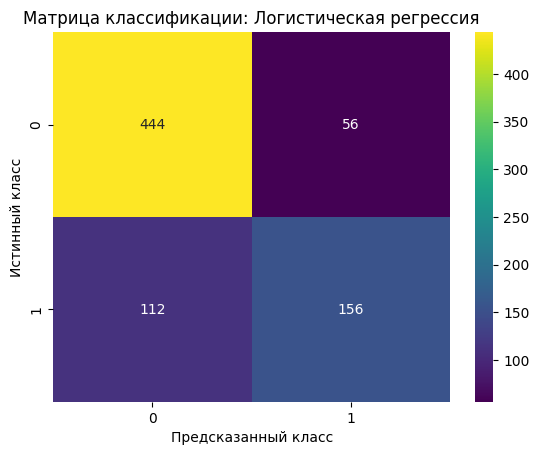

Модель: Метод опорных векторов (SVM) - Линейное ядро
Точность: 0.78
Матрица классификации:
[[443  57]
 [114 154]]



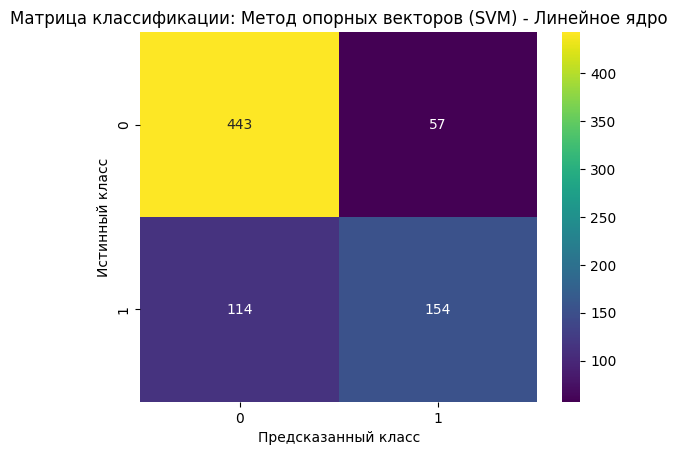

Модель: Метод опорных векторов (SVM) - Полиномиальное ядро
Точность: 0.78
Матрица классификации:
[[465  35]
 [137 131]]



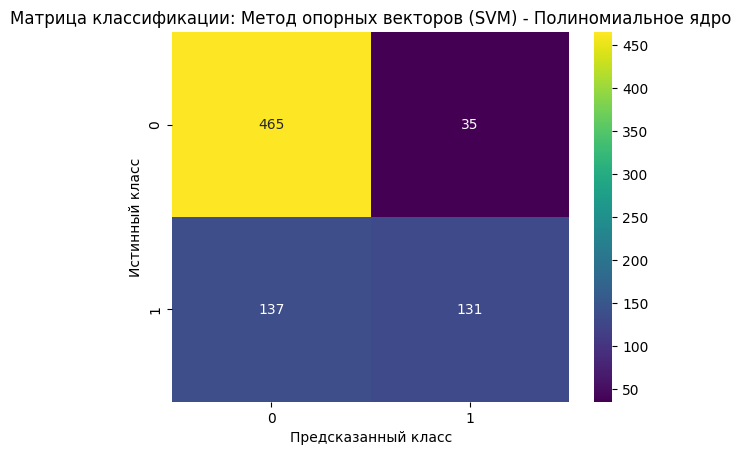

Модель: Метод ближайших соседей (KNN)
Точность: 0.80
Матрица классификации:
[[442  58]
 [ 93 175]]



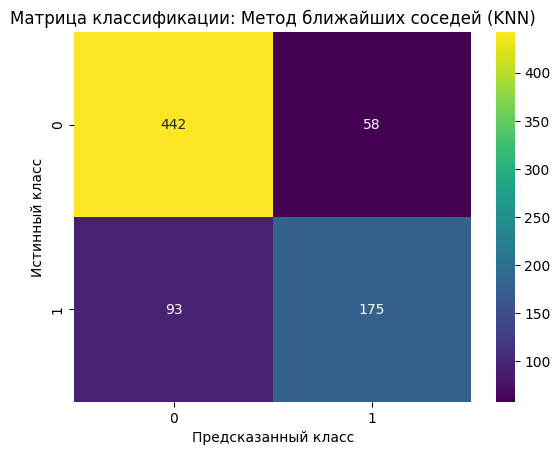

Модель: Многослойный перцептрон (MLP)
Точность: 0.76
Матрица классификации:
[[444  56]
 [129 139]]



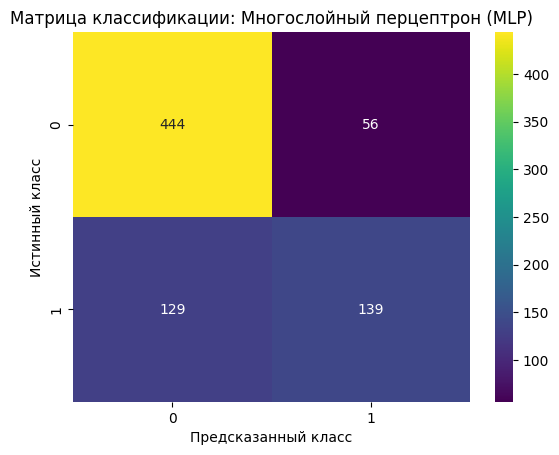

Модель: Дерево решений
Точность: 1.00
Матрица классификации:
[[500   0]
 [  0 268]]



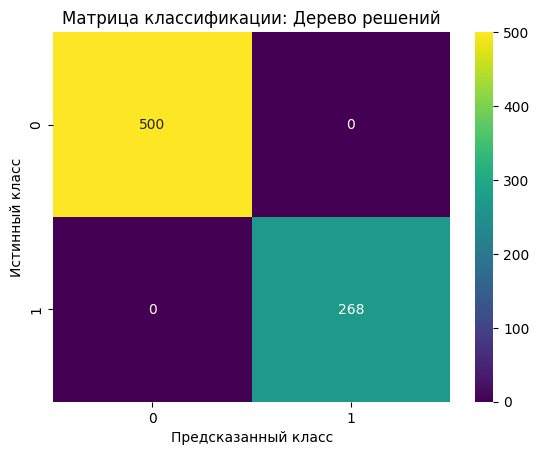

Модель: Наивный байесовский классификатор
Точность: 0.76
Матрица классификации:
[[421  79]
 [103 165]]



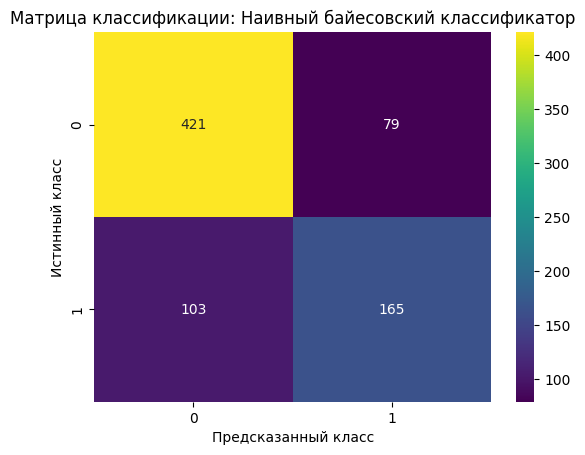

Модель: Случайный лес
Точность: 1.00
Матрица классификации:
[[500   0]
 [  0 268]]



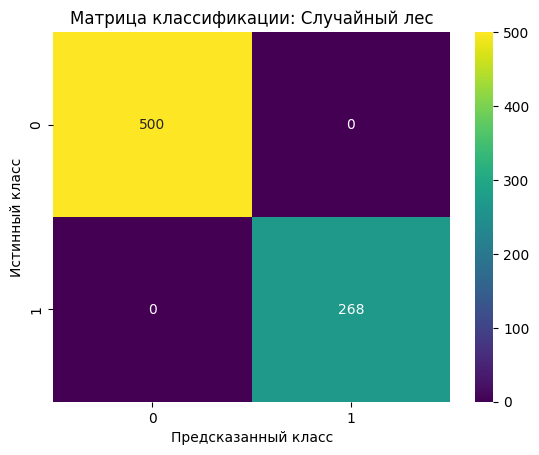

Модель: Бэггинг
Точность: 0.98
Матрица классификации:
[[498   2]
 [ 12 256]]



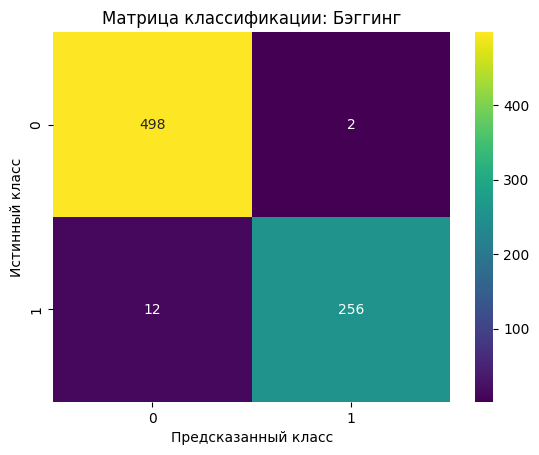

In [21]:
def evaluate_models(X, y, models):
    from sklearn import metrics
    import seaborn as sns
    import matplotlib.pyplot as plt

    for name, model in models.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        accuracy = metrics.accuracy_score(y, y_pred)
        conf_matrix = metrics.confusion_matrix(y, y_pred)

        print(f"Модель: {name}")
        print(f"Точность: {accuracy:.2f}")
        print("Матрица классификации:")
        print(conf_matrix)
        print()

        # Визуализация матрицы классификации
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
        plt.xlabel('Предсказанный класс')
        plt.ylabel('Истинный класс')
        plt.title(f'Матрица классификации: {name}')
        plt.show()

# Вызов функции с ранее определенными моделями
evaluate_models(X, y, models)

###4. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [24]:
# Загрузка данных ирисов
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

In [25]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# Создание и обучение модели логистической регрессии
logistic_iris = LogisticRegression(max_iter=200)
logistic_iris.fit(X_train, y_train)

# Предсказание
y_pred_iris = logistic_iris.predict(X_test)

In [26]:
# Оценка качества
conf_matrix_iris = metrics.confusion_matrix(y_test, y_pred_iris)
print("Матрица классификации (Ирисы):\n", conf_matrix_iris)

Матрица классификации (Ирисы):
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


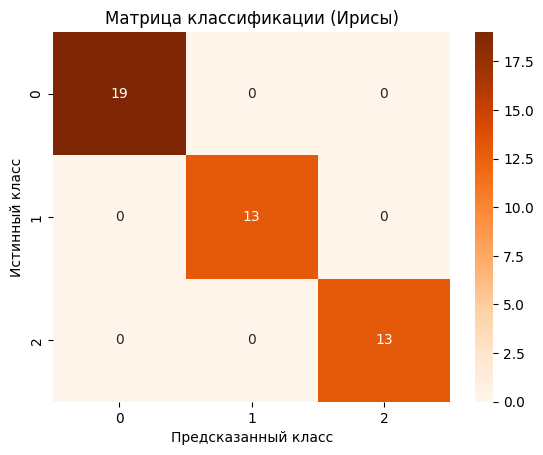

In [27]:
# Визуализация матрицы классификации
sns.heatmap(conf_matrix_iris, annot=True, fmt="d", cmap="Oranges")
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица классификации (Ирисы)')
plt.show()

In [28]:
# Отчет о классификации
print("Отчет о классификации (Ирисы):\n", metrics.classification_report(y_test, y_pred_iris))

Отчет о классификации (Ирисы):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [29]:
# Точность модели
accuracy_iris = logistic_iris.score(X_test, y_test)
print(f"Точность модели (Ирисы): {accuracy_iris:.2f}")

Точность модели (Ирисы): 1.00
